# Homework 2: Object Oriented Programming and Agent Based Modeling (ABM)

<img src="https://cmse.msu.edu/_assets/images/about/image001.png"
     alt="CMSE Logo"
     align="right" 
     width="200"/>

### <p style="text-align: right;"> &#9989; Pranaov.</p>

<img src="https://cdn.motor1.com/images/mgl/6nkJZ/s1/the-2022-ford-f-150-lightning-electric-truck-charging-at-electrify-america-s-200th-charging-station-in-california-located-at-westfield-valley-fair-shopping-center-in-santa-clara..webp" width=600px align="top" style="margin-left: 5px" alt="Image credit: https://insideevs.com/news/567694/chargers-outnumber-gas-stations-soon/">


### Goals for this homework assignment
By the end of this assignment, you should be able to:
* Understand and implement agent objects.
* Run and modify agent based models.
* Create your own class using inheritance from a super class

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.




---
## **1. Implement ABM of Installations of Electric Car Charging Stations (22 points)**
<img src="https://www.olsun.com/wp-content/uploads/2020/11/electrical-vehicle-charging-systems-main.jpg" width=300px align="right" style="margin-left: 20px" alt="Image credit:https://www.olsun.com/capabilities/electric-car-vehicle-charging-station-manufacturer/">

To advance the adoption of electric vehicles around the country, there needs to be a concerted effort to install the infrastructure of electric car charging stations.  For this part of the assignment, you're going to implement an Agent Based Model (ABM) of the installation of electric charging stations in a country.  The basic rules of this model are:

1. The country will be modeled as a square grid.
2. Installation teams try to install a charging station at each location in the grid; Once a charging station is installed it lasts forever.
3. At every increment of time, an installation team visits one random location in the grid and has a chance of succeeding at installing a station. Each install team has their own probability of success based on the skills+experience of the team. 
4. At each location in grid, sometimes the install teams fails to install a charging station because of various forces outside the control of the team such as inability to secure permits, necessary contracts, or local supplies.  Because of these forces outside the control of the team, each location in the grid has its own base probability of receiving a charging station. 
5. If a team fails to install a charging station at a location, it still makes a positive impact by improving the base probability of that location receiving a charging station in the future. 
6. Each time step in the model represents one month.


Execute the cell below to load python necessary packages.

In [2]:
## import the needed packages
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output 
import time
import random

Read through the following code that sets up this model and performs a simulation.  Then, answer the questions below.

In [7]:
# Create a class to represent agent based model of electric charging stations for cars
class ChargeLocationsWorld:
    def __init__(self, board_size=25, num_installers=5,num_initial_stations=10):
        self.board_size = board_size
        self.num_stations = num_initial_stations
        
        # initialize the map of stations
        self.charge_station_map = np.zeros([self.board_size,self.board_size])
        # create the initial stations
        self.place_initial_stations()

        # set up base probability of installing a station
        self.base_probability_map = np.zeros([self.board_size,self.board_size])
        self.set_base_probabilities()

        # create the installers
        self.installer_list = []
        experience_level = [0.5, 0.75, 1.0]  # to represent 3 levels of experience+success from low to high
        for i in range(num_installers):
            experience_now = experience_level[np.random.randint(0,3)]
            self.installer_list.append(InstallTeam(experience_now))


    def place_initial_stations(self):
        # loop over the number of initial stations
        for s in range(self.num_stations):
            # pick a random location
            (x,y) = (np.random.randint(0,self.board_size), np.random.randint(0,self.board_size))
            # set the location to 1 to represent a station
            self.charge_station_map[x,y] = 1

    def set_base_probabilities(self):
        # set base probability of each location having a successful install
        mu=0.5
        sigma=0.2
        # loop over the board
        for x in range(self.board_size):
            for y in range(self.board_size):
                # set the probability at each location
                self.base_probability_map[x,y] = np.abs(sigma*np.random.randn()+mu)

    def improve_base_probability(self, x,y):
        # improve the base probability at a location
        self.base_probability_map[x,y] = self.base_probability_map[x,y]*1.3
        

    def return_empty_locations(self):
        # return a list of the locations that are empty
        empty_locations = []
        for x in range(self.board_size):
            for y in range(self.board_size):
                if self.charge_station_map[x,y] == 0:
                    empty_locations.append([x,y])
        return empty_locations

    def plot_world(self):
        # Create a figure with two subplots side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        map_display = np.copy(self.charge_station_map)
        # loop over the installers and add their locations
        for installer in self.installer_list:
            map_display[installer.current_location[0],installer.current_location[1]] = 2

        # Display the first plot on the left subplot with the "hot" colormap
        ax1.imshow(map_display, cmap='hot')
        ax1.set_title('Installed Stations')

        # Display the second plot on the right subplot with the "hot" colormap
        im = ax2.imshow(self.base_probability_map, cmap='jet')
        ax2.set_title('Base Probability of Install')
        # Add a colorbar to the right plot
        cbar = fig.colorbar(im, ax=ax2)
        cbar.set_label('Probability of Install')
        # Adjust spacing between subplots
        plt.tight_layout()

        # Show the plots
        plt.show()

# Class to represent an install team
class InstallTeam:
    def __init__(self, install_skill_prob):
        self.install_skill_prob = install_skill_prob
        self.current_location=[0,0]

    def set_location(self, x,y):
        self.current_location = [x,y]

    def attempt_install(self,prob_success):
        
        # modify with effectiveness/experience of installer
        prob_success = prob_success*self.install_skill_prob

        # get a random number for success of install
        rand_num = np.random.rand()
        # check if the install was successful
        if rand_num < prob_success: 
            return True
        else:
            return False


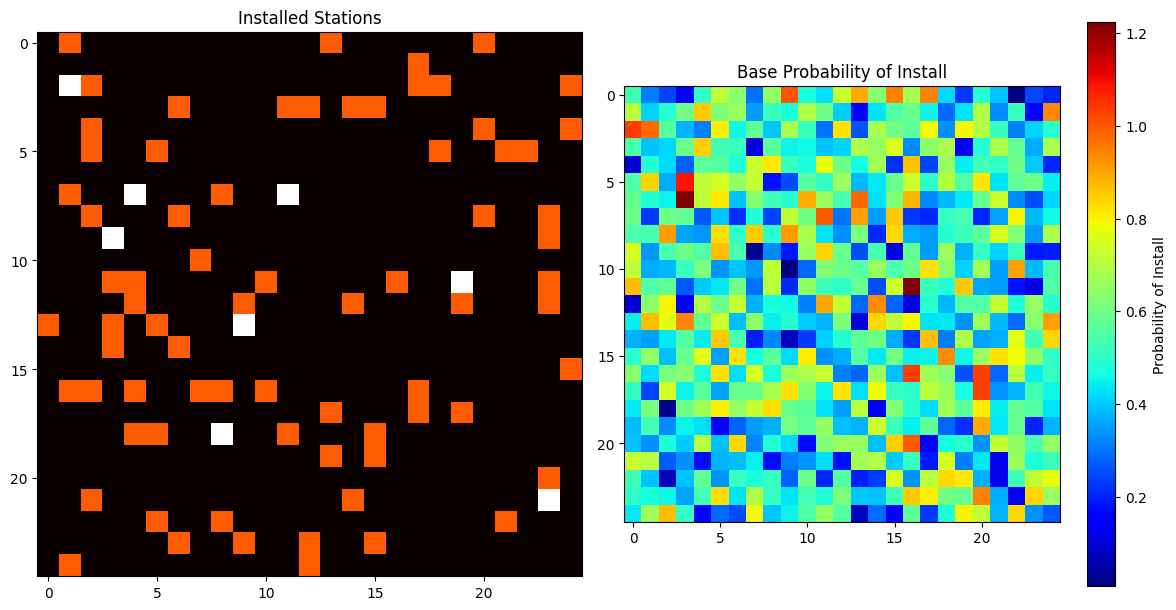

In [8]:
# Perform simulation of installers installing electric charging stations
world_object = ChargeLocationsWorld(25,8)

# loop over months
for tstep in range(25):
    # loop over installers
    for installer_now in world_object.installer_list:
        # pick a random location that does not have a station
        empty_locations = world_object.return_empty_locations()
        (x,y) = empty_locations[np.random.randint(0,len(empty_locations))]
        
        # set the location for the installer for this time step
        installer_now.set_location(x,y)
        # attempt to install a station at this location
        success = installer_now.attempt_install(world_object.base_probability_map[x,y])
        # if successful, add a station; else improve base probability
        if success:
            world_object.charge_station_map[x,y] = 1
        else:
            world_object.improve_base_probability(x,y)
    # plot the world
    world_object.plot_world()
    clear_output(wait=True) # Clear output for dynamic display


&#9989; **Question 1.1 (2 points)**: Using the simulation and code above, what do the orange and white colors in the left plot represent?

<font size=6 color="#009600">&#9998;</font> Your answer here: white represents successfully installed charging stations and orange represents where installers are present.


&#9989; **Question 1.2 (2 points)**: What is being represented in the right plot as time progresses?

<font size=6 color="#009600">&#9998;</font> Your answer here: probability of a successful installation of a charging station at each location.


&#9989; **Question 1.3 (2 points)**: For the code above, how many install teams are there in the simulation?

<font size=6 color="#009600">&#9998;</font> Your answer here: 8


&#9989; **Question 1.4 (5 points)**: Using this model, the electric vehicle company would like to estimate approximately how long will it take (how many months) to install charging stations in 15% of the locations in the country? They would like to know what this result looks like for the default model as they'd like to minimize the number of install teams that they would like to hire.

Write code below that uses this model (**with the default model values as defined in the class**) to answer this question.  (Note: you will likely find it use to start by copying simulation code from above to run the model and do this calculation; use a `print()` statement to display result; your results will likely vary slightly each time you run this.)

In [18]:
# Put your code here to run the simulation and see results
world_object = ChargeLocationsWorld(25,8)
total= world_object.board_size * world_object.board_size
percent_stations = int(0.15 * total)

# loop over months
for tstep in range(1000):
    # loop over installers
    for installer_now in world_object.installer_list:
        # pick a random location that does not have a station
        empty_locations = world_object.return_empty_locations()
        (x,y) = empty_locations[np.random.randint(0,len(empty_locations))]
        # set the location for the installer for this time step
        installer_now.set_location(x,y)
        # attempt to install a station at this location
        success = installer_now.attempt_install(world_object.base_probability_map[x,y])
        # if successful, add a station; else improve base probability
        if success:
            world_object.charge_station_map[x,y] = 1
        else:
            world_object.improve_base_probability(x,y)
    # plot the world
    world_object.plot_world()
    clear_output(wait=True) # Clear output for dynamic display
    current_stations = int(np.sum(world_object.charge_station_map))
    if current_stations >= percent_stations:
        print(tstep)
        break

28


&#9989; **Question 1.5 (8 points)**: After reviewing the previous results, the electric vehicle companies think the install process is taking too long.  They recruited and hired three new superb install teams from a neighboring country.  These install teams have **twice the experience (twice the success rates) as the current most highly experienced install teams** you've been able to hire (that means their experience level is twice that of the current maximum experience level being used in the model).

Modify the code so that it adds three of these superb install teams to the model and then rerun the simulation.  Also, modify the code to change the left display plot to include a different color for the original teams and the superb teams.

To do this, create a class definition that inherits all of the properties from the `ChargeLocationsWorld` class, adds these superb installers during the class initiations, and performs a slightly different `plot_world`.  (Hint: one way to do this is to add a new list of superb installers in the construction of this child class and add a new method to this child class to plot the world with different colors for regular vs superb installers) 

(Note: Any solution that uses class inheritance is acceptable)

When successful, you simulation should look something like this (of course the color choices will be up to you):

<img width=500px src="https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/HW/Homework_2_FS23/suberb_installers.gif">

**Attention**: for this simulation, you should plan on hiring **8** of the normal install teams, alongside the 3 new superb install teams that you've added to the model.

In [43]:
# Put your code here to run the simulation to display the results
class SuperbWorld(ChargeLocationsWorld):
    def init(self, board_size=25, num_installers=8, num_initial_stations=10):
        super().__init__(board_size, num_installers, num_initial_stations)
        self.superb_installers = []
        for i in range(3):
           superb_team = InstallTeam(2.0)
           self.superb_installers.append(superb_team)

    def plot_world(self):
         map_display = np.copy(self.charge_station_map)
         for installer in self.installer_list:
          x, y = installer.current_location
          map_display[x, y] = 2

         for installer in self.superb_installers:
            x, y = installer.current_location
            map_display[x, y] = 3

         fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
         ax1.imshow(map_display, cmap='hot', vmin=0, vmax=3)
         ax1.set_title('white=superb,orange=regular')
         im = ax2.imshow(self.base_probability_map, cmap='jet')
         ax2.set_title('Base Probability of Install')
         cbar = fig.colorbar(im, ax=ax2)
         cbar.set_label('Probability')
         plt.tight_layout()
         plt.show()



&#9989; **Question 1.6 (5 points)**: Now that you have an updated version of the model that meets the company's new hiring plan (which involved hiring 3 of these new superb installers), try re-running your analysis (by copying and modifying your code from above) to determine how many months it will take to install charging stations in 15% of the country with these new teams on the job. As you did in Question 1.4, you should plan on using the **default number** of "normal installers" along side these three new superb installers -- this will allow you to directly compare the impact of hiring these 3 new installers.

With this simulation, you're trying to answer: **How much faster does your simulation hit the 15% mark?** (you'll put your answer in the provided markdown cell below)

In [49]:
# Put your code here to run the simulation and see results
world_object = SuperbWorld()
world_object.init(25, 8) 
total= world_object.board_size * world_object.board_size
percent_stations = int(0.15 * total)

# loop over months
for tstep in range(1000):
    for installer_now in world_object.installer_list:
        empty_locations = world_object.return_empty_locations()
        (x,y) = empty_locations[np.random.randint(0,len(empty_locations))]
        installer_now.set_location(x,y)
        success = installer_now.attempt_install(world_object.base_probability_map[x,y])
        if success:
            world_object.charge_station_map[x,y] = 1
        else:
            world_object.improve_base_probability(x,y)
    
    for installer_now in world_object.superb_installers:
        empty_locations = world_object.return_empty_locations()
        (x,y) = empty_locations[np.random.randint(0,len(empty_locations))]
        installer_now.set_location(x,y)
        success = installer_now.attempt_install(world_object.base_probability_map[x,y])
        if success:
            world_object.charge_station_map[x,y] = 1
        else:
            world_object.improve_base_probability(x,y)

    # plot the world
    world_object.plot_world()
    clear_output(wait=True)
    current_stations = int(np.sum(world_object.charge_station_map))
    if current_stations >= percent_stations:
        print(tstep)
        break


13


<font size=6 color="#009600">&#9998;</font> Your answer here: 
**Question**: How much faster does the addition of the superb installers allow the stations to be installed to hit the 15% mark? How are you calculating/quantifying this number given the inherent randomness in the simulation? How certain are you of your answer?

**Answer**: on average, the 3 superb installer reduce the total months to install 15% of total charging stations from mid to high 20's to low teens. the lowest I observed was around 13 months in one simulation.


&#9989; **Question 1.7 (6 points)**: This model is an approximation of a real phenomena.  What are two real-life changes that could be implemented to increase the rate of charging station installs and lead to full coverage of the country faster?  How could these two changes be implemented in your model?

<font size=6 color="#009600">&#9998;</font> Your answer here: (complete answers are required for full credit)

Change 1: hiring more skilled workers tend to reduce the installation times of charging stations, as observed.

Change 1 Implementation in computational model: we alreadt implemented this above. created 3 skilled workers with double the experience of the most skilled workers we had.

Change 2: create easier to build charging stations 

Change 2 Implementation in computational model: reduce the overall time it takes to build one charging station, so the average success probability for a normal worker increases from 


---
### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University